### The Quantum Fisher Information (QFI)

One of the key tools in Quantum Metrology where ultra-precise measurements are required, such as in gravitational wave detection or high-precision clocks, is Quantum Fisher Information (QFI), which quantifies the amount of information that a quantum state carries about a parameter to be estimated. The QFI is crucial for understanding the limits of precision in quantum measurements and plays a vital role in determining the sensitivity of quantum sensors.

Quantum Fisher Information (QFI) is a cornerstone concept in quantum metrology and plays a pivotal role in enhancing the precision of parameter estimation, which is critical for a wide array of quantum technologies. By quantifying how much information a quantum state carries about an unknown parameter, QFI allows us to determine the ultimate precision limits that can be achieved when estimating this parameter. This is particularly important in scenarios where quantum states are used to probe physical systems, making QFI a key player in optimizing quantum sensors and improving measurement accuracy beyond classical limits.

The QFI is intrinsically linked to the geometry of quantum states. It measures the sensitivity of a quantum state to changes in a parameter, with higher QFI indicating greater sensitivity. This relationship can be understood through the lens of the quantum Cramér-Rao bound, which provides a lower bound on the variance of any unbiased estimator of the parameter. Thus, the QFI sets a fundamental limit on the precision of any estimation process, guiding the design and implementation of quantum experiments.

In the context of quantum computing, QFI finds applications in various advanced algorithms and protocols. For instance, in quantum machine learning, QFI can be used to optimize variational algorithms by identifying optimal quantum states that are most sensitive to the parameters being trained. Additionally, in quantum sensing, QFI helps in designing protocols that can achieve the highest possible sensitivity, making it invaluable in fields such as gravitational wave detection, where detecting minute signals is crucial.

Furthermore, QFI is not just theoretical; it is also implementable in quantum circuits using tools like Qiskit. One can construct circuits that calculate QFI by leveraging quantum gates and measurements tailored to the specific parameter of interest. This practical approach enables researchers to simulate and analyze the behavior of quantum systems under different conditions, providing insights into how best to extract information from quantum states.

As quantum technology continues to advance, the importance of QFI will only grow, particularly in fields that demand high-precision measurements. Future developments may see the integration of QFI-based techniques into real-world quantum sensors and computing devices, pushing the boundaries of what can be measured and computed with unprecedented accuracy. The ongoing research into QFI is paving the way for breakthroughs in quantum-enhanced technologies, ensuring that we are better equipped to harness the full potential of quantum mechanics in practical applications.



The Quantum Fisher Information (QFI) is given by:

$$
\mathcal{F}(\rho, \hat{H}) = \text{Tr} \left[ \rho \left( \frac{\partial \hat{H}}{\partial \theta} \right)^2 \right] - \text{Tr} \left[ \rho \frac{\partial \hat{H}}{\partial \theta} \right]^2
$$

where:
* $\rho$ is the density matrix of the quantum state.
* $\hat{H}$ is the Hamiltonian or the generator of the parameter $\theta$.
* $\text{Tr}$ denotes the trace operation.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize simulator
simulator = AerSimulator()

In [3]:
# Define a parameterized phase angle
theta = Parameter('θ')

In [4]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

In [5]:
# Prepare the initial state
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1)  # Create entanglement between qubit 0 and qubit 1

In [6]:
# Apply the parameterized phase rotation
qc.rz(theta, 1)

In [7]:
# Apply another Hadamard gate before measurement
qc.h(0)

In [8]:
# Transpile the circuit for the simulator
try:
    compiled_circuit = transpile(qc, simulator)
except transpile.TranspileError:
    print("Transpilation failed! Check your circuit for compatibility issues.")
    exit()

In [9]:
# Function to compute QFI using finite differences
def finite_difference_qfi(circuit, theta_val, delta=1e-6):
    # Substitute the parameter with a specific value
    bound_qc_plus = circuit.assign_parameters({theta: theta_val + delta})
    bound_qc_minus = circuit.assign_parameters({theta: theta_val - delta})

    # Get statevectors for both cases
    state_plus = Statevector.from_instruction(bound_qc_plus)
    state_minus = Statevector.from_instruction(bound_qc_minus)

    # Calculate the QFI using finite differences
    qfi = 4 * (np.abs(state_plus.inner(state_minus) - state_minus.inner(state_plus)) / (2 * delta)) ** 2
    return qfi

In [10]:
# Calculate the Quantum Fisher Information for a range of theta values
theta_vals = np.linspace(0, 2 * np.pi, 100)
qfi_vals = [finite_difference_qfi(compiled_circuit, t) for t in theta_vals]

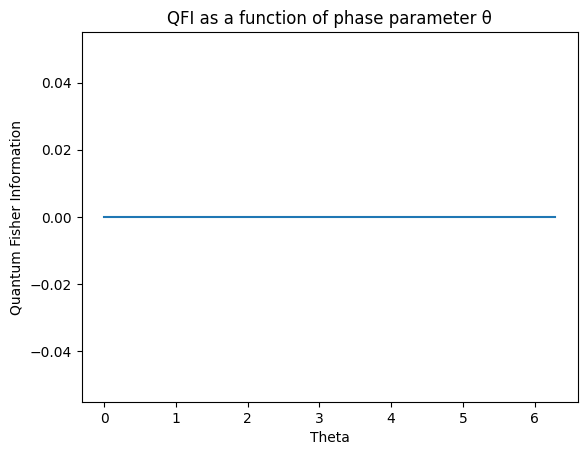

In [11]:
# Plot the QFI as a function of the phase parameter theta
plt.plot(theta_vals, qfi_vals)
plt.xlabel('Theta')
plt.ylabel('Quantum Fisher Information')
plt.title('QFI as a function of phase parameter θ')
plt.show()

In [12]:
# Bind a specific parameter value for the final simulation
final_circuit = compiled_circuit.assign_parameters({theta: 0})

In [13]:
# Add measurements to the final circuit
final_circuit.measure_all()

In [14]:
# Simulate and measure the circuit
result = simulator.run(final_circuit).result()

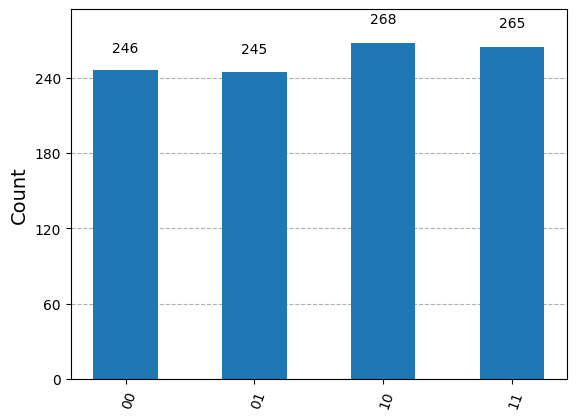

In [15]:
# Extract and plot the measurement results
counts = result.get_counts()
plot_histogram(counts)
plt.show() 